# Utilities

> Helper Functions that work on individual frames

In [3]:
#default_exp utils

In [4]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
#export
import cv2
import numpy as np
from matplotlib.pyplot import imshow
from typing import Any, Union, Optional, Callable

In [6]:
#export
__all__ = ['resize',
           'bgr2rgb', 'bgr2hsv', 'lapply',
           'Any', 'Union', 'Optional', 'Callable',
           'np', 'imshow', 'cv2']

## Convert Image to Other Formats

In [7]:
_, x = cv2.VideoCapture('files/interstellar-waves-edit.mp4').read()
type(x)
x.shape

numpy.ndarray

(480, 720, 3)

---

In [8]:
# this needs to be imported explicitly when using in the wild
# as torch is not a dependency for this package
import torch
def as_tensor(image,
              dtype: Union[torch.FloatTensor, torch.HalfTensor, None]=torch.FloatTensor,
              normalise: bool = False) -> torch.Tensor:
    "Convert numpy array to torch tensor"
    x = torch.from_numpy(image)
    ## add x.names = ('H', 'W', 'C') once the names API is stable
    if dtype is not None: x = x.type(dtype)
    if normalise: x.div_(255)
    return x

In [9]:
type(as_tensor(x))
as_tensor(x, torch.HalfTensor).dtype
as_tensor(x).shape
as_tensor(x).mean(), as_tensor(x, normalise=True).mean()

torch.Tensor

torch.float16

torch.Size([480, 720, 3])

(tensor(36.6933), tensor(0.1439))

---

In [10]:
#export
def bgr2rgb(x: np.ndarray) -> np.ndarray:
    """convert cv2 generated image array from BGR to RGB"""
    return cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

numpy.ndarray

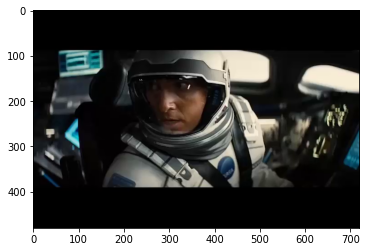

In [11]:
type(bgr2rgb(x))
imshow(bgr2rgb(x))

---

In [12]:
#export
def bgr2hsv(x: np.ndarray) -> np.ndarray:
    """convert cv2 generated image array from BGR to HSV"""
    return cv2.cvtColor(x, cv2.COLOR_BGR2HSV)

In [13]:
type(bgr2hsv(x))
(bgr2hsv(x)).shape

numpy.ndarray

(480, 720, 3)

---

In [14]:
#export
def lapply(x: Any, func: Callable) -> list:
    """Apply `func` to each element in list `x`"""
    return [func(i) for i in x]

In [15]:
type(x)
[type(i) for i in lapply([x, x, x], as_tensor)]

numpy.ndarray

[torch.Tensor, torch.Tensor, torch.Tensor]

---

## Resize Image

In [16]:
#export

## SOURCE --> https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
def resize(image, height=None, width=None, keep_aspect_ratio=True, scale_factor=1.):
    """
    Resize by `scale_factor` if preserving aspect ratio else
    resize by custom `height` and `width`
    """
    h,w,_ = [*image.shape]
    if keep_aspect_ratio:
        assert scale_factor is not None, 'Enter `scale_factor`'
        assert width is None and height is None, '`height` and `width` must be ' +\
        'None if preserving aspect ratio. Use `scale_factor` instead'
        height = int(h * scale_factor)
        width  = int(w * scale_factor)
    else: assert height is not None and width is not None, 'Enter desired `height` and `width`'
    return cv2.resize(image, (width, height), cv2.INTER_AREA)

In [17]:
resize(x).shape # scale_factor = 1. by default
resize(x, scale_factor=1.5).shape
resize(x, width=200, height=100, keep_aspect_ratio=False).shape

(480, 720, 3)

(720, 1080, 3)

(100, 200, 3)

### Export -

In [18]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_utils.ipynb.
Converted 01_io.ipynb.
Converted index.ipynb.
